In [1]:
import numpy as np
import pandas as pd
from lmfit import Model, Parameters
import matplotlib.pyplot as plt

In [2]:
avogadro_constant = 6.022e23

In [3]:
df_chem = pd.read_csv('concentracoes_tempo_1k.csv',sep=',')

In [4]:
df_chem

,Tempo,Cl,Na,NaCl
0,0.016667,523.0,477.0,0.0
1,0.033333,522.0,476.0,1.0
2,0.050000,521.0,475.0,2.0
3,0.066667,520.0,474.0,3.0
4,0.083333,517.0,471.0,6.0
...,...,...,...,...
3114,51.916667,99.0,53.0,424.0
3115,51.933333,99.0,53.0,424.0
3116,51.950000,99.0,53.0,424.0
3117,51.966667,99.0,53.0,424.0


In [5]:
def convert_to_concentration(df,liter):
    for column in range(1,df.shape[1]):
        #print(column)
        df.iloc[:,column] = ((df.iloc[:,column]/avogadro_constant)/liter)
    return df

In [6]:
df_mol = convert_to_concentration(df_chem,1)
df_mol

,Tempo,Cl,Na,NaCl
0,0.016667,8.684822e-22,7.920956e-22,0.000000e+00
1,0.033333,8.668217e-22,7.904351e-22,1.660578e-24
2,0.050000,8.651611e-22,7.887745e-22,3.321156e-24
3,0.066667,8.635005e-22,7.871139e-22,4.981734e-24
4,0.083333,8.585188e-22,7.821322e-22,9.963467e-24
...,...,...,...,...
3114,51.916667,1.643972e-22,8.801063e-23,7.040850e-22
3115,51.933333,1.643972e-22,8.801063e-23,7.040850e-22
3116,51.950000,1.643972e-22,8.801063e-23,7.040850e-22
3117,51.966667,1.643972e-22,8.801063e-23,7.040850e-22


[[Model]]
    Model(rate_equation)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2
    # data points      = 3119
    # variables        = 1
    chi-square         = 3.119e-247
    reduced chi-square = 0.00000000
    Akaike info crit   = -1795438.73
    Bayesian info crit = -1795432.68
    R-squared          = 1.00000000
##  Warning: uncertainties could not be estimated:
    k:  at initial value
[[Variables]]
    k:  1.00000000 +/- 0.00000000 (0.00%) (init = 1)


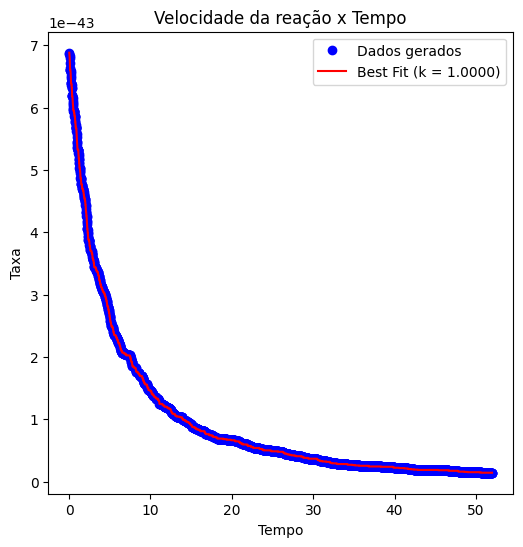

In [9]:
# Assuming your .csv file has columns 'time', 'A', and 'B'
x = {'Tempo': df_mol['Tempo'], 'Na': df_mol['Na'], 'Cl': df_mol['Cl']}

# Create a function for the rate equation
def rate_equation(x, k):
    return k * x['Na'] * x['Cl']

# Create an instance of the Model class
model = Model(rate_equation)

# Create a Parameters object to store the parameter values
params = Parameters()
params.add('k', value=1.0)

# Perform the fit
result = model.fit(x['Na'] * x['Cl'], params, x=x)

# Access the fit results
print(result.fit_report())

# Get the optimized rate constant
optimal_k = result.params['k'].value

# Visualize the fit
fig, ax = plt.subplots(figsize=(6, 6))  # Cria caixa para plot
plt.plot(x['Tempo'], x['Na'] * x['Cl'], 'bo', label='Dados gerados')
plt.plot(x['Tempo'], result.best_fit, 'r-', label=f'Best Fit (k = {optimal_k:.4f})')
plt.xlabel('Tempo')
plt.ylabel('Taxa')
plt.title('Velocidade da reação x Tempo')
plt.legend()
fig.savefig('fit_1k_particulas.png')  # Salva a figura
plt.show()


In [ ]:
#conclui-se que a equação velocidade de reação é dada por: vel. reação = 1*[A]*[B]